# Project: The Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Hello! Welcome to my Jupyter Notebook for this Udacity Project, part of the [Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002). I am using the TMDb dataset provided by Udacity to complete this project (TMDb = The Movie Database).

### I plan to use this data to explore 2 questions:
1. Which movie studios are the most "prolific"? (Most movies, biggest budgets, best bottom-line profits)
2. If a new movie studio was planning on launching their first movie in 2016, which genre should they choose?

I'll be completing this project with a handful of data analysis packages (<code>pandas</code>, <code>numpy</code>), data visualization packages (<code>matplotlib</code>, <code>seaborn</code>), and a couple of staple Python packages (<code>collections</code>, <code>Ipython.display</code>).

Let's begin by importing those packages now.

In [29]:
# Import necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import display, HTML


# Magic command for matplotlib, as well as setting seaborn styles for consistency across the notebook.
%matplotlib inline
sns.set_style("white")
sns.set_style("ticks")
sns.set(rc={'figure.figsize':(16,10)})

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Taking a look at the first few rows of the DataFrame <code>df</code>, it returns one row per movie, with information about its release year, popularity, budget and revenue, and the talent associated with the movie (the director, the cast, the production companies). There is also text meta data, such as the genre and keywords associated with the movies.

There are 10,866 movies in the <code>df</code>, and 21 features for each entry.

<div class="alert alert-block alert-info">
    <b>Observation:</b> The columns <code>cast</code>, <code>genres</code>, and <code>production_companies</code> store multiple values in each column separated by <code>|</code>. This may be a creative challenge to work around later, but we'll worry about that after the basic data cleaning is complete.
</div>

In [2]:
# Load data, print head.
df = pd.read_csv('tmdb-movies.csv')
df.head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Shape of df.
df.shape


(10866, 21)

### Exploring Continuous Variables

Taking a look at the distribution of statistics in <code>df.describe()</code>, there are some unexpected results in the minimums. Specifically, the columns <code>budget</code>, <code>revenue</code> and <code>runtime</code> have minimums of <code>0</code>. That means there are movies in this dataset listed as having no budget, no revenue, and the runtime is zero minutes long! We'll be sure to handle cleaning these columns early on in the wrangling.
    
<div class="alert alert-block alert-info">
    <b>Observation:</b> If you are paying close attention, you'll notice <code>budget_adj</code> and <code>revenue_adj</code> also have minimum values of <code>0</code>. I am assuming these are pegged to the values in <code>budget</code> and <code>revenue</code> respectively, and will be handled during the cleaning.
</div>

In [4]:
# Budget, revenue, and runtime mins are zero.
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Exploring Discrete Variables

Looking at the output of <code>df.info()</code>, a few discrete value columns that I plan to use in my analysis have null values: <code>cast</code>, <code>director</code>, and <code>production_companies</code>. In order to make it simpler to analyze the dataset using these column, I intend to drop rows with null values in any of these three columns to keep results tidy and prevent errors.

The other discrete columns I plan to leave as is, as the majority of them will not be used significantly (or at all) in my work, and therefore their null values do not need to be dropped.


In [5]:
# Things of note: cast, director, and production_companies have null values. I intend to drop these rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning I - Dropping Columns

Out of the 21 features in this dataset, close to half are superfluous for the questions I seek to answer, and some provide no analytical value (e.g.: <code>id</code>, <code>imdb_id</code>. I will drop 9 features from the DataFrame now.

In [6]:
# Print number of columns in df, pre-cleaning.
print("PRE : Number of features (columns) in df: {}".format(df.shape[1]))

# Drop columns that will not be used in analysis.
columnsToDrop = ['id','imdb_id','popularity','homepage','tagline',
                 'vote_count','vote_average','overview','release_date']
df.drop(columnsToDrop, axis=1,inplace=True)

# Print number of columns in df, post-cleaning.
print("POST: Number of features (columns) in df: {}\n".format(df.shape[1]))

PRE : Number of features (columns) in df: 21
POST: Number of features (columns) in df: 12



### Data Cleaning II - Cleaning Discrete Features

Using <code>df.dropna</code>, rows with null values in <code>cast</code>, <code>director</code>, or <code>production_companies</code> are removed from the data. The loss of data isn't too bad - the number of total records dropped from 10,866 to 9,780. We still have 90.00% of the dataset.

In [7]:
# Print number of rows in df, pre-cleaning.
print("PRE : Number of records (rows) in df: {}".format(df.shape[0]))

# Drop rows with null values in 'cast', 'director' or 'production_companies' columns.
df.dropna(subset=['cast','director','production_companies'], inplace=True)

# Print number of rows in df, post-cleaning.
print("POST: Number of records (rows) in df: {}\n".format(df.shape[0]))


PRE : Number of records (rows) in df: 10866
POST: Number of records (rows) in df: 9780



### Data Cleaning III - Cleaning Continuous Features

Now that the discrete features I care about are handled, it is time to turn my attention to the continuous features: <code>revenue</code>, <code>budget</code>, and <code>runtime</code>. As a reminder, I plan to drop all records that have a 0 for any of these features, as 0 represents missing or incomplete data that may influence results.

This turns out to be a "fork in the road" moment for the analysis. Once these continuous features are cleaned, the number of records drops down from 9,780 to 3,806 (35.02% of the original data). While many useless records have been discarded, there is some fear of losing good data with the bad.

I tried removing <code>runtime</code> from my filtering to see if that would buy me back any records. It did not. I do not want to remove either <code>revenue</code> or <code>budget</code> from my filtering, as I intend to rely heavily on those features. Therefore, I intend to move forward with these 3,806 records. 

<div class="alert alert-block alert-warning">
<b>Note:</b> For other projects, I would be hesitant with any data cleaning operation that removed nearly 2/3rds of the data in my DataFrame. I am making the choice here because clean <code>revenue</code> and <code>budget</code> columns will make the rest of my analysis easier. In other projects, equally strong justification would be needed for dropping such a high percentage of the original dataset. Even still, a limitation of this analysis is that I am now working on a representative sample of the entire original set in <code>df</code>.
</div>

In [8]:
# Print number of rows in df, pre-cleaning.
print("PRE : Number of records (rows) in df: {}".format(df.shape[0]))

# Drop rows with 0 in revenue, budget, or runtime.
df = df[(df['revenue'] != 0) & (df['budget'] != 0) & (df['runtime'] != 0)]

# Drop rows with 0 in budget, revenue, or runtime.
print("POST: Number of records (rows) in df: {}\n".format(df.shape[0]))

PRE : Number of records (rows) in df: 9780
POST: Number of records (rows) in df: 3806



### Data Cleaning IV - Fixing Data Types

The heaviest part of the cleaning is done, now I'm tuning things. I noticed the features <code>budget_adj</code> and <code>revenue_adj</code> were data typed as floats instead of int64. This is unlikely to have a major affect on the analysis, but for consistency's sake I am going to convert the type to int64.

In [9]:
# Print dtypes in features, pre-cleaning.
print("PRE : budget_adj dtype:  {}".format(df.budget_adj.dtype))
print("PRE : revenue_adj dtype: {}\n".format(df.revenue_adj.dtype))

# Handling data types so continuous features are all typed identically.
dtypeCols = ['budget_adj', 'revenue_adj']
df[dtypeCols] = df[dtypeCols].applymap(np.int64)

# Print dtypes in features, post-cleaning.

print("POST: budget_adj dtype:  {}".format(df.budget_adj.dtype))
print("POST: revenue_adj dtype: {}\n".format(df.revenue_adj.dtype))

PRE : budget_adj dtype:  float64
PRE : revenue_adj dtype: float64

POST: budget_adj dtype:  int64
POST: revenue_adj dtype: int64



### Data Cleaning V - Feature Engineering

Now for a little bit of fun. Whenever I see two variables that naturally interact with each other, I want to combine them as a way to reduce dimensionality and gain new insight (E.G., Runs Scored vs. Runs Allowed in a baseball season). The features <code>budget</code> and <code>revenue</code> (as well as <code>budget_adj</code> and <code>revenue_adj</code>) can easily be combined to tell us how much a movie actually made: <code>profit</code>, <code>profit_adj</code>.

In [10]:
# Feature engineering to create new columns: profit, profit_adj.
df['profit'] = df.revenue - df.budget
df['profit_adj'] = df.revenue_adj - df.budget_adj

# Print head of new features.
display(df[['profit','profit_adj']].head(3))

,profit,profit_adj
0,1363528810,1254445953
1,228436354,210161353
2,185238201,170419070


### Data Cleaning - Wrapping it Up

The cleaning is done! For the sake of making it look nice, I'll rearrange the order of columns in <code>df</code> so there is a sensible, left-right read of the features. I'm generally pleased with the results of this cleaning, although I did experience some frustration over losing nearly 65% of the records. This set is ready to be manipulated into meaningful visuals and statistics that answer my original questions.

In [11]:
# Reorganize DataFrame's column order to keep things tidy.
df = df[['original_title','director','cast','production_companies','genres','release_year',
         'runtime','budget','budget_adj','revenue','revenue_adj','profit','profit_adj']]

## Print head of cleaned, final data.
display(df.head(3))

,original_title,director,cast,production_companies,genres,release_year,runtime,budget,budget_adj,revenue,revenue_adj,profit,profit_adj
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,2015,124,150000000,137999939,1513528810,1392445892,1363528810,1254445953
1,Mad Max: Fury Road,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...,Action|Adventure|Science Fiction|Thriller,2015,120,150000000,137999939,378436354,348161292,228436354,210161353
2,Insurgent,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Summit Entertainment|Mandeville Films|Red Wago...,Adventure|Science Fiction|Thriller,2015,119,110000000,101199955,295238201,271619025,185238201,170419070


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which Studio is the most Prolific?

What do I mean when I say "prolific"? Normally, prolific creators are people who put out a lot of content and, broadly speaking, see success from their creations. For movie studios, I'll start by finding how many movies each studio has been involved in.

The data in the column <code>production_companies</code> is a bit messy since it stores multiple studios in one column. For now, I will just worry about counting the number of times each studio is present in <code>df.production_companies</code>. This can be done splitting values in the column by <code>|</code>, sending them to a list, and then using <code>Counter()</code> to return tuples of the top 10 most common studios. I'll then unpack these tuples into <code>x_val</code> and <code>y_val</code> for plotting.

In [12]:
# Create a list of tuples for the top 10 studios by movies created.
studios = df['production_companies'].str.split("|").tolist()
studios = [studio for list_ in studios for studio in list_]
topTenStudios = Counter(studios).most_common(10)

# Unpack tuples for plotting.
x_val = [x[0] for x in topTenStudios]
y_val = [y[1] for y in topTenStudios]


Now, let's create a simple seaborn plot using <code>sns.barplot()</code> and feed it the unpacked tuple lists <code>x_val</code> and <code>y_val</code>, as well as pass along some visual formatting information.

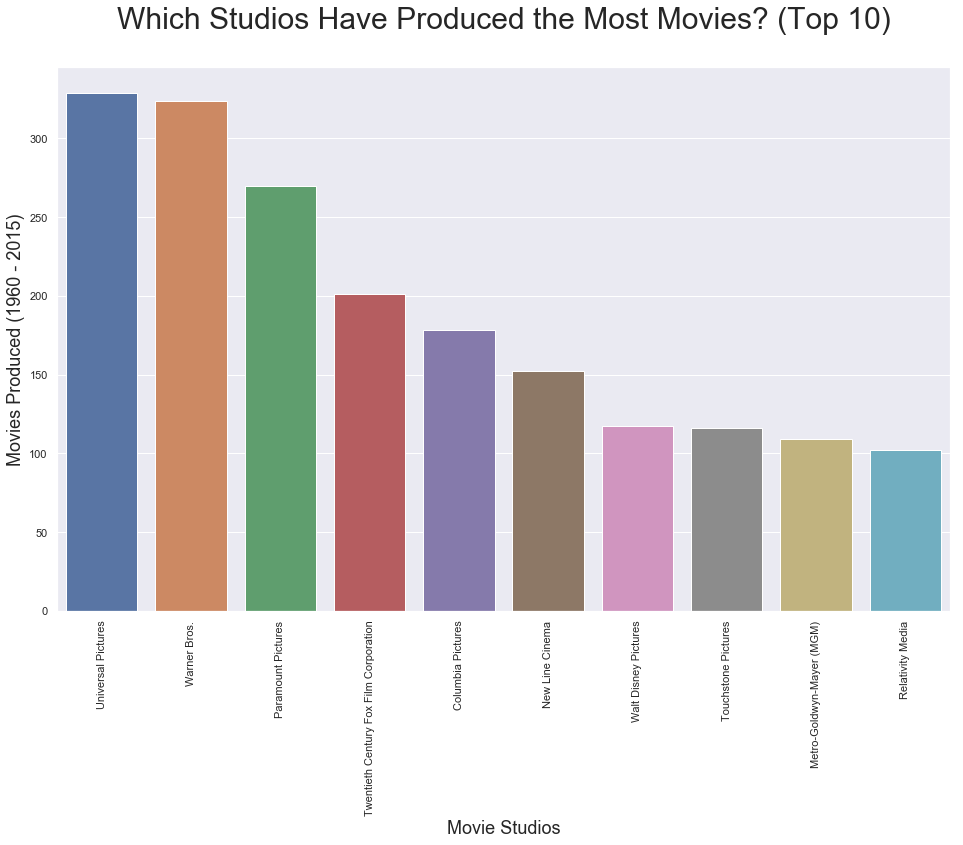

In [30]:
# Build plot for top 10 studios that have produced the most movies.
sns.barplot(x=x_val,y=y_val)
plt.xticks(rotation=90)
plt.xlabel('Movie Studios', fontsize = 18)
plt.ylabel('Movies Produced (1960 - 2015)', fontsize = 18)
plt.title('Which Studios Have Produced the Most Movies? (Top 10)\n', fontsize = 30)
plt.show()


Nice! We now have a barplot showing the top 10 studios defined by movies they were involved in producing. One thing to note about <code>df</code>: the cleaned dataset only has movies back to 1960. So it would be more accurate to say this is the top 10 studios as defined by movies they were involved in producing between 1960 - 2015.

There are some unsuprising entries in this list: companies like Universal Pictures, Warner Bros., and Walt Disney, that produce many of the movies we see released in theaters regularly with each big summer and holiday season.


| Studio | # of Movies Involved In   |
|------|------|
|   Universal Pictures  | 329|
|   Warner Bros.  | 324|
|   Paramount Pictures  | 270|
|   Twentieth Century Fox Film Corporation  | 201|
|   Columbia Pictures  | 178|
|   New Line Cinema  | 152|
|   Walt Disney Pictures  | 117|
|   Touchstone Pictures  | 116|
|   MGM  | 109|
|   Relativity Media  | 102|


For consistency's sake, I'll follow these 10 studios throughout the rest of the analysis in question 1. I'll save a list of these 10 studios to a new variable, <code>ourStudios</code>.

In [14]:
# Let's follow these 10 studios for the rest of this question by saving x_val to ourStudios.
ourStudios = x_val

# Test that ourStudios has the expected list.
print(ourStudios)

['Universal Pictures', 'Warner Bros.', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'New Line Cinema', 'Walt Disney Pictures', 'Touchstone Pictures', 'Metro-Goldwyn-Mayer (MGM)', 'Relativity Media']


Now that we have our top 10 studios saved in <code>ourStudios</code>, let's use that to dive deeper into the business activity of these studios. In Holywood, big movies take big money -- so let's see which studios are involved with movies that are spending the most money!

To do this, I'm going to need a more nuanced handling of the values stored in the column <code>production_companies</code>. I'm going to use a lambda function to create a dummy DataFrame, <code>studiosSeparated</code>, that will pivot out each of the values in the column into new columns such as <code>studio_1</code>, <code>studio_2</code>, and so on.

In [31]:
# Create a column for each studio in each row, separated.
studiosSeparated = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"studio_{x+1}"))

# Create budget DataFrame, join Studios_df.
studios = df.join(studiosSeparated)

display(studios.head(3))

,original_title,director,cast,production_companies,genres,release_year,runtime,budget,budget_adj,revenue,revenue_adj,profit,profit_adj,studio_1,studio_2,studio_3,studio_4,studio_5
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,2015,124,150000000,137999939,1513528810,1392445892,1363528810,1254445953,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Mad Max: Fury Road,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...,Action|Adventure|Science Fiction|Thriller,2015,120,150000000,137999939,378436354,348161292,228436354,210161353,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Insurgent,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Summit Entertainment|Mandeville Films|Red Wago...,Adventure|Science Fiction|Thriller,2015,119,110000000,101199955,295238201,271619025,185238201,170419070,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None


Very cool! Looking at the head of the updated <code>studios</code> DataFrame, there are five new columns that save cleanly stored values for which production companies were involved in making the movie. This is the first half of the cleaning process.

For the second half, I now need to melt down the results so that there is one row for each movie-studio combination. I can do this using <code>pd.melt</code>, which will allow me to compress my data into the desired shape. Once it is melted, I can use <code>ourStudios</code> to filter for only rows with our top 10 studios, and then group the results so there is one row for each studio-year combination with <code>budget</code> and <code>budget_adj</code> aggregated with <code>sum()</code>.

<div class="alert alert-block alert-warning">
<b>Note:</b> One impact this approach to reshaping the data has is that I am attributing the FULL budget of the movie to each studio involved with the movie. In other words, if I summed the <code>budget</code> column in <code>studios</code>, it would be much higher than the <code>budget</code> column before the melting. I could equally divide the budget between each studio involved, but that wouldn't be accurate either -- I would be assuming each production company bore an equal piece of the financial burden, which would make the data clean but untrue. For the sake of this analysis, I am accepting that there is multi-attribution going on, and okay with that as I am looking at each studio individually to see the annual budgets of the projects they are involved in producing.
</div>

In [16]:
# Create budget DataFrame.
budget = studios[['release_year','budget','budget_adj','studio_1','studio_2','studio_3','studio_4','studio_5']]

# Melt budget to clean it for a time series of profit. This means budget is being attributed to all studios.
budget = pd.melt(budget, id_vars = ['release_year','budget','budget_adj'],value_name='studio')
budget.drop('variable',axis=1,inplace=True)

# Drop all the 2nd, 3rd, etc. Studios that aren't in ourStudios.
budget = budget[budget.studio.isin(ourStudios)]

# Group results to prepare for plotting.
budget = budget.groupby(['studio','release_year']).sum()
budget.reset_index(inplace=True)
display(budget.head(3))


,studio,release_year,budget,budget_adj
0,Columbia Pictures,1961,6000000,43769167
1,Columbia Pictures,1975,5000000,20259105
2,Columbia Pictures,1977,3500000,12592233


Okay, the data is in the shape necessary to plot this. If I were to do a line plot of these 10 studios, however, it would turn into a "spaghetti plot" -- a whole lot of lines that look messy and with very little interpretability. Instead, I am going to use a <code>FacetGrid</code> to create small multiple area plots. For these plots, I'll use <code>budget_adj</code> as this will reduce some of the inflation that would cause <code>budget</code> to naturally trend "up and to the right".

After the <code>FacetGrid</code> is made, I'll also look to see what the annual budgets look like for the top 10 studios in 2015, the latest year in the result set.

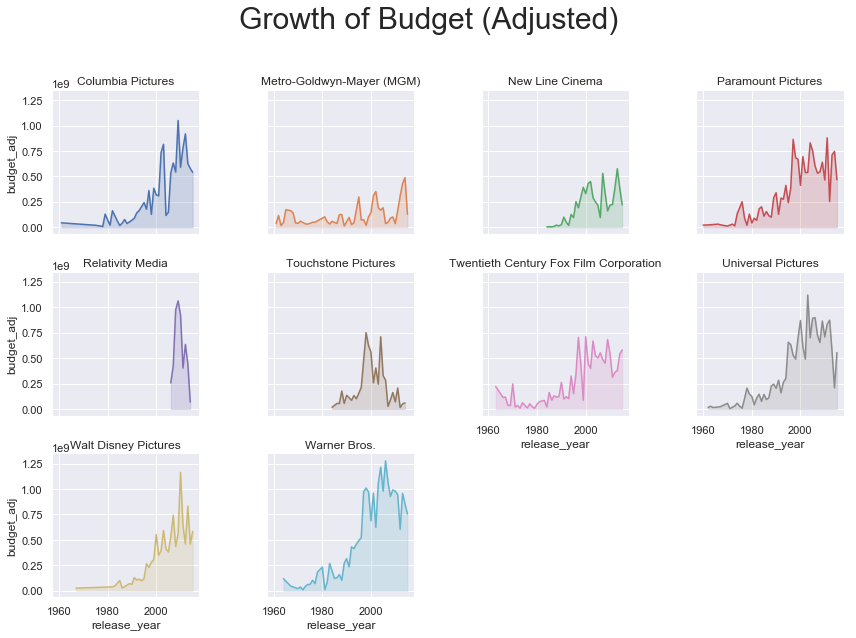

In [17]:
# Create a grid.
g = sns.FacetGrid(budget, col='studio', hue='studio', col_wrap=4)
 
# Add the line over the area with the plot function.
g.map(plt.plot, 'release_year', 'budget_adj')
 
# Fill the area with fill_between.
g.map(plt.fill_between, 'release_year', 'budget_adj', alpha=0.2).set_titles("{col_name} BUDGET")
 
# Control the title of each facet.
g.set_titles("{col_name}", fontsize = 14)
 
# Add a title for the whole plot.
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Growth of Budget (Adjusted)\n\n\n', fontsize = 30)
g.fig.subplots_adjust(top=.85)
plt.show()


In [18]:
# Print out budget spent latest year.
display(budget[budget['release_year'] == 2015].sort_values(by='budget_adj',ascending=False))

,studio,release_year,budget,budget_adj
379,Warner Bros.,2015,820800003,755135663
332,Walt Disney Pictures,2015,635000000,584199742
249,Twentieth Century Fox Film Corporation,2015,632000001,581439741
300,Universal Pictures,2015,603000000,554759749
36,Columbia Pictures,2015,587000000,540039759
162,Paramount Pictures,2015,508000000,467359790
114,New Line Cinema,2015,239100000,219971899
82,Metro-Goldwyn-Mayer (MGM),2015,139000000,127879940


Not suprisingly, we can see that most studios are moving "up and to the right" despite using <code>budget_adj</code>. Studios are spending more money to make bigger movies, and more of them.

Specifically, studios like Warner Bros (\\$755M USD spent in 2015), Walt Disney Pictures (\\$584M USD spent in 2015), and Twentieth Century Fox Film Corporation (\\$581M USD spent in 2015) are continuing to invest heavily in production. However, they have seen some stagnation and volatility in their annual budgets since 2000.

The plot also shows the story of some of the newcomers in this top 10 list. Studios like Touchstone and New Line Cinema were only involved in productions after the year 1980, and Relativity Media was involved in no productions earlier than 2000 (though their budget has dropped off in the past few years).

<div class="alert alert-block alert-info">
    <b>Pause:</b> It's important to think how the multi-attribution of budgets that occurred during the melting may have affected these results. For example, if one of these studios plays a small role in a higher number of movies, the full budget of each of those movies are counted in their totals. A way the original data set could be improved is by tracking the percentage of contribution each studio made to the budget (and similarly, the revenue they received).
</div>

Now we know who the big spenders are. But the question remains: who makes the money at the box office? To answer this, we'll repeat very similar steps to prepare the profit data over the next few cells.

In [19]:
# Create profit DataFrame.
profit = studios[['release_year','profit','profit_adj','studio_1','studio_2','studio_3','studio_4','studio_5']]

# Melt profit to clean it for a time series of profit. This means profit is being attributed to all studios.
profit = pd.melt(profit, id_vars = ['release_year','profit','profit_adj'],value_name='studio')
profit.drop('variable',axis=1,inplace=True)

# Drop all the 2nd, 3rd, etc. Studios that aren't in ourStudios.
profit = profit[profit.studio.isin(ourStudios)]

# Group results to prepare for plotting.
profit = profit.groupby(['studio','release_year']).sum()
profit.reset_index(inplace=True)
display(profit.head(3))


,studio,release_year,profit,profit_adj
0,Columbia Pictures,1961,22900000,167052321
1,Columbia Pictures,1975,29251525,118521949
2,Columbia Pictures,1977,12500000,44972263


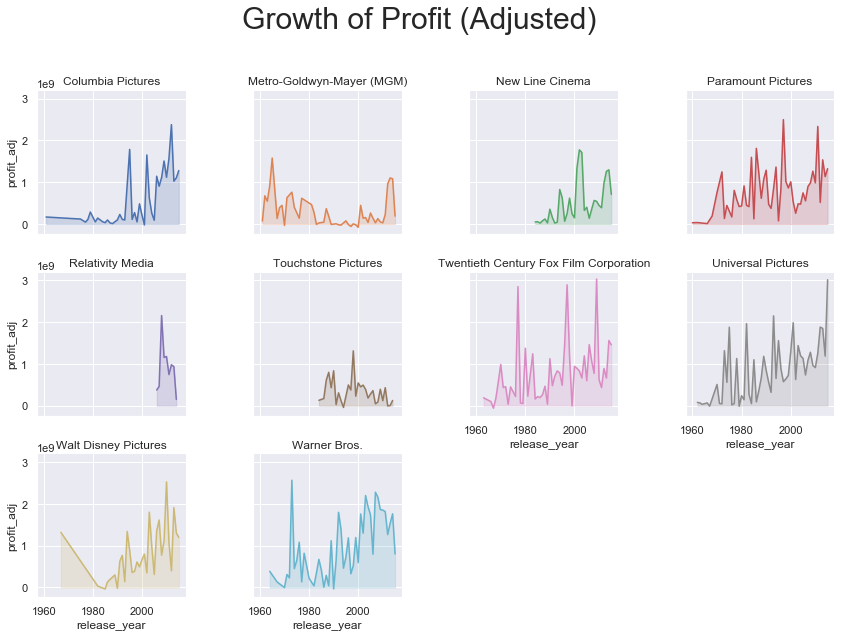

In [20]:
# Create a grid.
g = sns.FacetGrid(profit, col='studio', hue='studio', col_wrap=4)
 
# Add the line over the area with the plot function.
g.map(plt.plot, 'release_year', 'profit_adj')
 
# Fill the area with fill_between.
g.map(plt.fill_between, 'release_year', 'profit_adj', alpha=0.2).set_titles("{col_name} PROFIT")
 
# Control the title of each facet.
g.set_titles("{col_name}", fontsize = 14)
 
# Add a title for the whole plot.
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Growth of Profit (Adjusted)\n\n\n', fontsize = 30)
g.fig.subplots_adjust(top=.85)
plt.show()


In [21]:
# Print out budget spent latest year.
display(profit[profit['release_year'] == 2015].sort_values(by='profit_adj',ascending=False))

,studio,release_year,profit,profit_adj
300,Universal Pictures,2015,3275448797,3013411569
249,Twentieth Century Fox Film Corporation,2015,1582043656,1455479525
162,Paramount Pictures,2015,1437757817,1322736609
36,Columbia Pictures,2015,1389582589,1278415420
332,Walt Disney Pictures,2015,1302021777,1197859506
379,Warner Bros.,2015,870368348,800738527
114,New Line Cinema,2015,769690189,708114662
82,Metro-Goldwyn-Mayer (MGM),2015,202335668,186148732


Now we are starting to see a clearer picture of which studio are in good shape. Studios like Universal Pictures are churning out profitable movies like a factory; studios like MGM and Touchstone Pictures see much more modest returns; and two studios, one being Relativity Media, did not post any profit in 2015 at all.

The health of these business lines is contextual. For example, Walt Disney Pictures seems to have release schedules of every other year with movies, causing large but fairly predicatable spikes in profit. For Disney, this is a healthy business line because it is supplemental to all of their other product and merchandising lines. On the other hand, MGM seems to be one of a few studios that is trending down. Most of its high profit years were between 1960 - 1980. Unless MGM has other business lines supporting them, their presence in this top 10 profilic studios list seems to be as that of a legacy player, a "has been", not of that as an up and comer or dominant market player.

### Research Question 2: Which Genres are Producing the Most Profit?

So far, we've explored which studios make the most money. But let's say I just launched a fictional new studio, and I wanted to start turning a profit as quickly as possible. What movie genres are producing the most profit?

First, let's do a little extra data cleaning. Similar to how <code>production_companies</code> was handled, I am going to pivot out the genres into a new DataFrame <code>genresSeparated</code>, and then join that back onto <code>df</code> into a new DataFrame simply called <code>genres</code>.

In [22]:
# Create a column for each studio in each row, separated.
genresSeparated = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genre_{x+1}"))

# Create budget DataFrame, join Studios_df.
genres = df.join(genresSeparated)

display(genres.head(3))

,original_title,director,cast,production_companies,genres,release_year,runtime,budget,budget_adj,revenue,revenue_adj,profit,profit_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,2015,124,150000000,137999939,1513528810,1392445892,1363528810,1254445953,Action,Adventure,Science Fiction,Thriller,None
1,Mad Max: Fury Road,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...,Action|Adventure|Science Fiction|Thriller,2015,120,150000000,137999939,378436354,348161292,228436354,210161353,Action,Adventure,Science Fiction,Thriller,None
2,Insurgent,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Summit Entertainment|Mandeville Films|Red Wago...,Adventure|Science Fiction|Thriller,2015,119,110000000,101199955,295238201,271619025,185238201,170419070,Adventure,Science Fiction,Thriller,None,None


Now I'm going to start doing some work that looks very similar to what was done in the analysis for studios. I'm going to subset the columns in <code>genres</code> I care about into the DataFrame <code>genreProfit</code>, and melt that down.

In [23]:
# Create genreProfit DataFrame.
genreProfit = genres[['release_year','profit','profit_adj','genre_1','genre_2','genre_3','genre_4','genre_5']]

# Melt budget to clean it for a time series of profit. This means budget is being attributed to all studios.
genreProfit = pd.melt(genreProfit, id_vars = ['release_year','profit','profit_adj'],value_name='genre')
genreProfit.drop('variable',axis=1,inplace=True)


In my grouping of <code>genreProfit</code>, I want to save both the number of movies represented by each genre, and the profit associated with those movies. To do this, I'm going to first create a grouped by DataFrame object <code>count</code>, that is grouped by the count of records for each genre-year combination (number of movies). Then, I am going to update <code>genreProfit</code> to also make it a grouped by DataFrame object, this one grouped by the sum of <code>profit</code> and <code>profit_adj</code> in each genre-year combination.

Once this is all done. I'm going to join <code>genreProfit</code> and <code>count</code> together, do a litle work to drop the superfluous columns and rename the remaining ones, and then we'll have the data needed to get moving here.

In [24]:
# Determine number of movies per genre per year.
count = genreProfit.groupby(['genre','release_year']).count()
count.reset_index(inplace=True)

# Group results to prepare for plotting.
genreProfit = genreProfit.groupby(['genre','release_year']).sum()
genreProfit.reset_index(inplace=True)

# Join genreProfit on count.
genreProfit = genreProfit.join(count,lsuffix='_l', rsuffix='_r')
genreProfit.drop(['genre_r','release_year_r','profit_r'],axis=1,inplace=True)
genreProfit.rename(index=str, columns={"genre_l": "genre", "release_year_l": "release_year",
                                       "profit_l": "profit", "profit_adj_l": "profit_adj",
                                       "profit_adj_r": "num_movies"}, inplace=True)

# Print post-join DataFrame.
display(genreProfit.head(3))

,genre,release_year,profit,profit_adj,num_movies
0,Action,1960,50905000,375320909,2
1,Action,1961,21200000,154651057,2
2,Action,1962,93500000,673989970,2


Now let's create a <code>FacetGrid</code> to see the <code>profit_adj</code> performance of genres over the past 55 years!

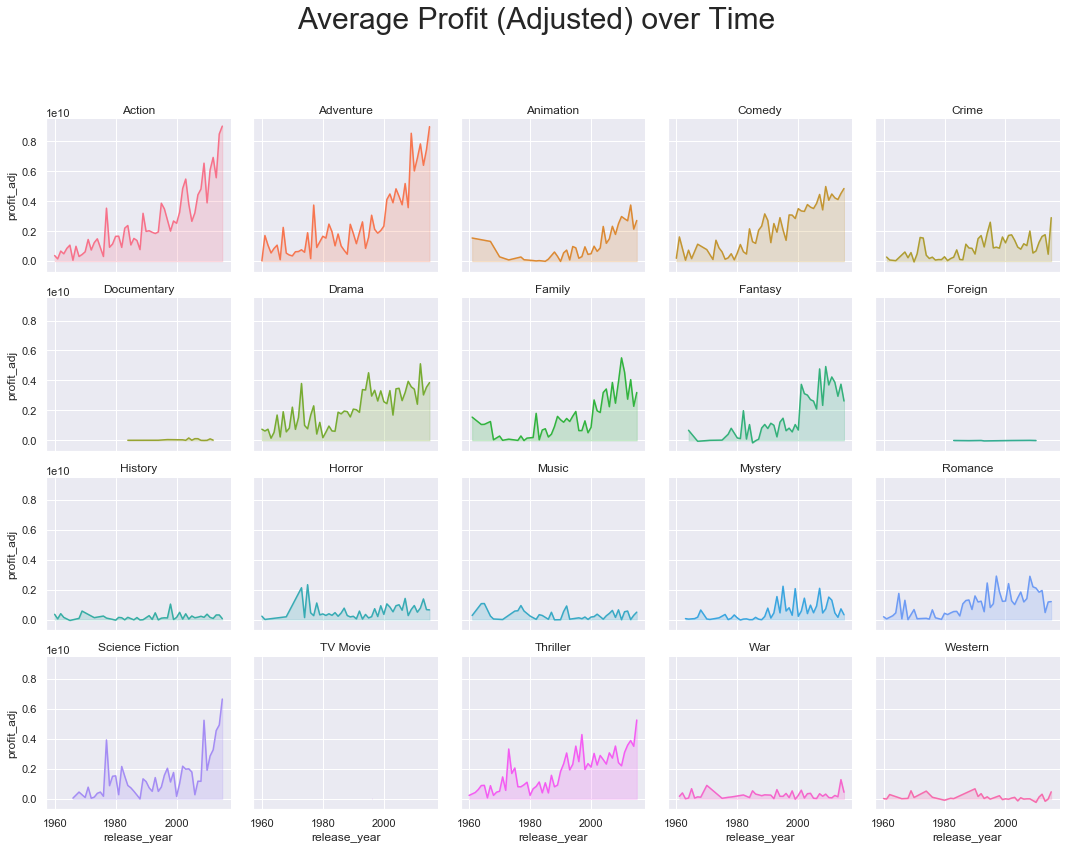

,genre,release_year,profit,profit_adj,num_movies
54,Action,2015,9796359014,9012646327,37
110,Adventure,2015,9761223512,8980321677,34
702,Science Fiction,2015,7240628560,6661375341,22
758,Thriller,2015,5719303825,5261757210,47
200,Comedy,2015,5271741758,4850000290,52
322,Drama,2015,4192541174,3857136197,81
369,Family,2015,3476587252,3198458863,13
252,Crime,2015,3157101952,2904532520,24
149,Animation,2015,2952577950,2716370517,9
411,Fantasy,2015,2855908092,2627434289,13


In [25]:
# Create a grid.
g = sns.FacetGrid(genreProfit, col='genre', hue='genre', col_wrap=5)
 
# Add the line over the area with the plot function.
g.map(plt.plot, 'release_year', 'profit_adj')
 
# Fill the area with fill_between.
g.map(plt.fill_between, 'release_year', 'profit_adj', alpha=0.2).set_titles("{col_name} PROFIT")
 
# Control the title of each facet.
g.set_titles("{col_name}", fontsize = 14)
 
# Add a title for the whole plot.
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average Profit (Adjusted) over Time\n\n\n', fontsize = 30)
g.fig.subplots_adjust(top=.85)
plt.show()

# Print out budget spent latest year.
display(genreProfit[genreProfit['release_year'] == 2015].sort_values(by='profit_adj',ascending=False))


Okay, we have some clear trending winners and losers here. Genres like Action, Adventure, and (within the past few years) Science Fiction are generating the highest profits for studios. Genres like  Western, War, Mystery, and History are much lower performers.

However, there are some implicit limitations happening here (beyond the mult-attribution limitation, the same one that affected research question 1). What if Action is so high in total profits because there are dozens of movies flooding the market each year? What if Western is comprised of only a couple big hits a year? I don't want to know how each genre is doing overall in profit. I want to know the per movie profit for each genre in each year to better understand which genre is a good market to enter into right now and make a movie.

I'm going to feature engineer two new columns, <code>per_movie_profit</code> and <code>per_movie_profit_adj</code>, by diving both <code>profit</code> and <code>profit_adj</code> by <code>num_movies</code> (created by our grouped by DataFrame <code>count</code> a few cells earlier).

In [26]:
# Feature Engineering: Determining the per movie average profit per genre, year over year.
genreProfit['per_movie_profit'] = genreProfit.profit / genreProfit.num_movies
genreProfit['per_movie_profit_adj'] = genreProfit.profit_adj / genreProfit.num_movies


Now, let's use the newly created features to create a <code>FacetGrid</code> that tracks the per-movie profit trends over time!

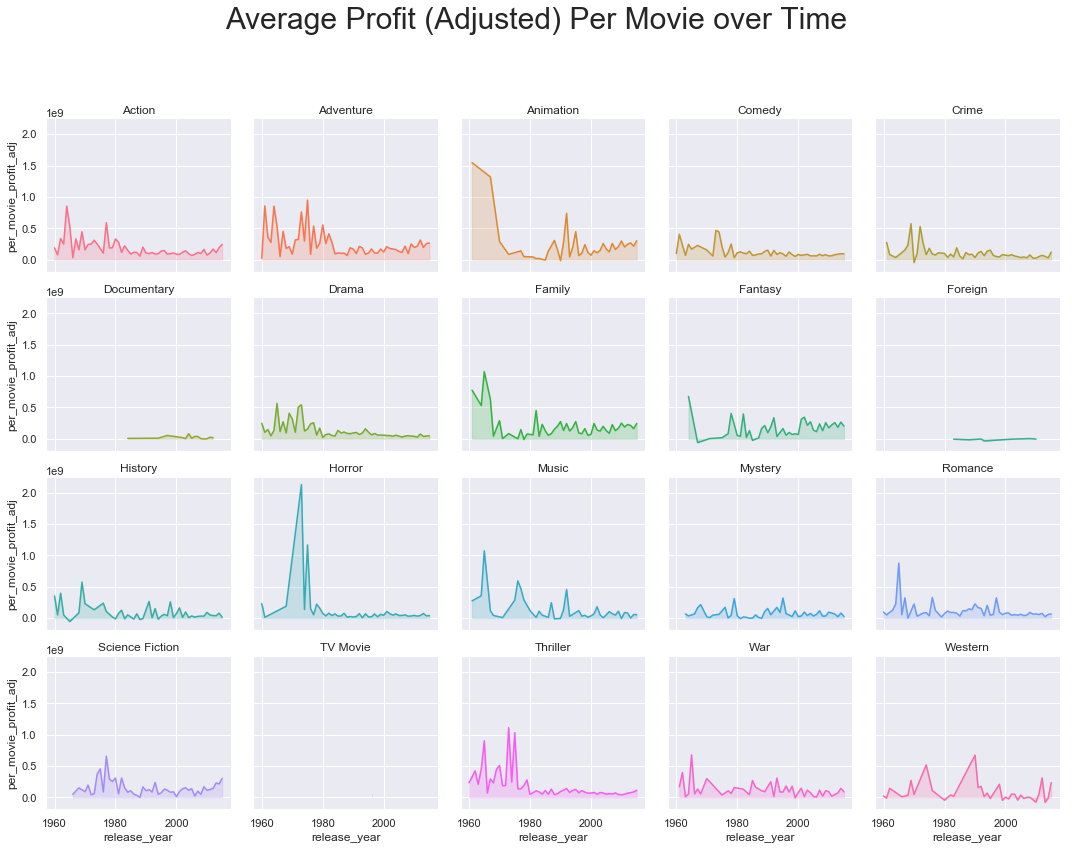

In [27]:
# Create a grid.
g = sns.FacetGrid(genreProfit, col='genre', hue='genre', col_wrap=5)
 
# Add the line over the area with the plot function.
g.map(plt.plot, 'release_year', 'per_movie_profit_adj')
 
# Fill the area with fill_between.
g.map(plt.fill_between, 'release_year', 'per_movie_profit_adj', alpha=0.2).set_titles("{col_name} PROFIT")
 
# Control the title of each facet.
g.set_titles("{col_name}", fontsize = 14)
 
# Add a title for the whole plot.
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average Profit (Adjusted) Per Movie over Time\n\n\n', fontsize = 30)
g.fig.subplots_adjust(top=.85)
plt.show()


In [28]:
# Print out budget spent latest year.
display(genreProfit[genreProfit['release_year'] == 2015].sort_values(by='per_movie_profit_adj',ascending=False))

,genre,release_year,profit,profit_adj,num_movies,per_movie_profit,per_movie_profit_adj
702,Science Fiction,2015,7240628560,6661375341,22,3.291195e+08,3.027898e+08
149,Animation,2015,2952577950,2716370517,9,3.280642e+08,3.018189e+08
110,Adventure,2015,9761223512,8980321677,34,2.870948e+08,2.641271e+08
369,Family,2015,3476587252,3198458863,13,2.674298e+08,2.460353e+08
54,Action,2015,9796359014,9012646327,37,2.647665e+08,2.435850e+08
838,Western,2015,509710620,468933564,2,2.548553e+08,2.344668e+08
411,Fantasy,2015,2855908092,2627434289,13,2.196852e+08,2.021103e+08
252,Crime,2015,3157101952,2904532520,24,1.315459e+08,1.210222e+08
758,Thriller,2015,5719303825,5261757210,47,1.216873e+08,1.119523e+08
200,Comedy,2015,5271741758,4850000290,52,1.013796e+08,9.326924e+07


Aha! This looks slightly different than the results of the genre totals. Action and Adventure genre movies look much less enticing as it becomes clear how saturated that market is -- they are still high performing movies, but 34 Adventure and 37 Action movies were released in 2015. Science Fiction also remains high on the list, but it too has 20+ movies that were released in 2015 -- a profitable, and busy, competition space.

Separately, some genres are seeing weaker per-movie profits than they did 50 years ago. Genres like Horror and Thriller were much strong in the 1970's, and fell off after 1980. Classic horror movies during this time like _Halloween_ likely helped these two genres succeed at the time.

Some interesting results come up in the top 6 genres with <10 movies released in 2015. Animation movies and (who would have guessed!) Western movies are both genres with high per-movie performance, and a low number of movies last year. These may be promising markets to enter into for a new studio looking to make its first new film.

<a id='conclusions'></a>
## Conclusions


**Data Cleaning (and Data Limitations):**
* Due to missing values, 2/3rds of this dataset has to be dropped before analysis could be done. There is risk that the analysis was done on a subset that is not representative of the whole.
* The storing of information in features such as <code>production_companies</code> and <code>genres</code> creates a multi-attribution problem for summary statistics and time series.
* For the analysis I sought to do, I was able to drop close to half of the original features, and create a few new features to support the data visualization process.

**Question 1:**
* The studios that make the most movies are not necessarily the most profitable studios.
* Dominant and established studios like Universal, Warner Bros., Columbia, and Walt Disney continue to see healthy growth and market leadership.
* Newer studios created in the last 40 years are struggling to remain profitable amongst the top 10 content creating studios, with the exception of New Line Cinema (one of the studios involved with Peter Jackson's Lord of the Rings trilogy).

**Question 2:**
* Analyzing per-unit profit (per-movie profit) is important for understanding the 'shape' of the trend within each genre.
* If a new studio wanted to pick a genre that balances expected profit with minimal competition, a safe bet would be Science Fiction, while riskier bets could include Animation and Western (riskier because there is less competition, but less per-movie profit).

## Thank you for taking time to review this Udacity Project in the Data Analyst Nanodegree!